#Import Library

In [ ]:
#Import Library

from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from statsmodels.stats.contingency_tables import mcnemar
from sklearn.neighbors import NearestNeighbors

#Import Data

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BIG DATA/data.csv')
df.head(5)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


#Eksplorasi Data dan Preprocessing Data

### Pemilihan Variabel

In [ ]:
df = df[[' Current Ratio', ' Quick Ratio', ' Debt ratio %', ' Net Income to Total Assets', " Net Income to Stockholder's Equity", ' Total Asset Turnover', 'Bankrupt?']]
df.head()

,Current Ratio,Quick Ratio,Debt ratio %,Net Income to Total Assets,Net Income to Stockholder's Equity,Total Asset Turnover,Bankrupt?
0,0.002259,0.001208,0.207576,0.716845,0.827890,0.086957,1
1,0.006016,0.004039,0.171176,0.795297,0.839969,0.064468,1
2,0.011543,0.005348,0.207516,0.774670,0.836774,0.014993,1
3,0.004194,0.002896,0.151465,0.739555,0.834697,0.089955,1
4,0.006022,0.003727,0.106509,0.795016,0.839973,0.175412,1


In [ ]:
df.tail()

,Current Ratio,Quick Ratio,Debt ratio %,Net Income to Total Assets,Net Income to Stockholder's Equity,Total Asset Turnover,Bankrupt?
6814,0.010451,0.005457,0.124618,0.799927,0.840359,0.103448,0
6815,0.009259,0.006741,0.099253,0.799748,0.840306,0.103448,0
6816,0.038424,0.035112,0.038939,0.797778,0.840138,0.106447,0
6817,0.012782,0.007256,0.086979,0.811808,0.841084,0.109445,0
6818,0.051348,0.040897,0.014149,0.815956,0.841019,0.002999,0


In [ ]:
X=df[[" Current Ratio"," Quick Ratio"," Debt ratio %"," Net Income to Total Assets"," Net Income to Stockholder's Equity"," Total Asset Turnover"]]
Y=df[['Bankrupt?']]

###Pengecekkan Missing Value

In [ ]:
print(df.isnull().values.any())

False


### Pengecekkan Data Duplikat

In [ ]:
# Lihat jumlah duplikat
print("Jumlah baris duplikat:", df.duplicated().sum())

# Lihat data yang duplikat
print("Baris duplikat:")
print(df[df.duplicated()])

Jumlah baris duplikat: 0
Baris duplikat:
Empty DataFrame
Columns: [ Current Ratio,  Quick Ratio,  Debt ratio %,  Net Income to Total Assets,  Net Income to Stockholder's Equity,  Total Asset Turnover, Bankrupt?]
Index: []


### Pengecekkan Outlier

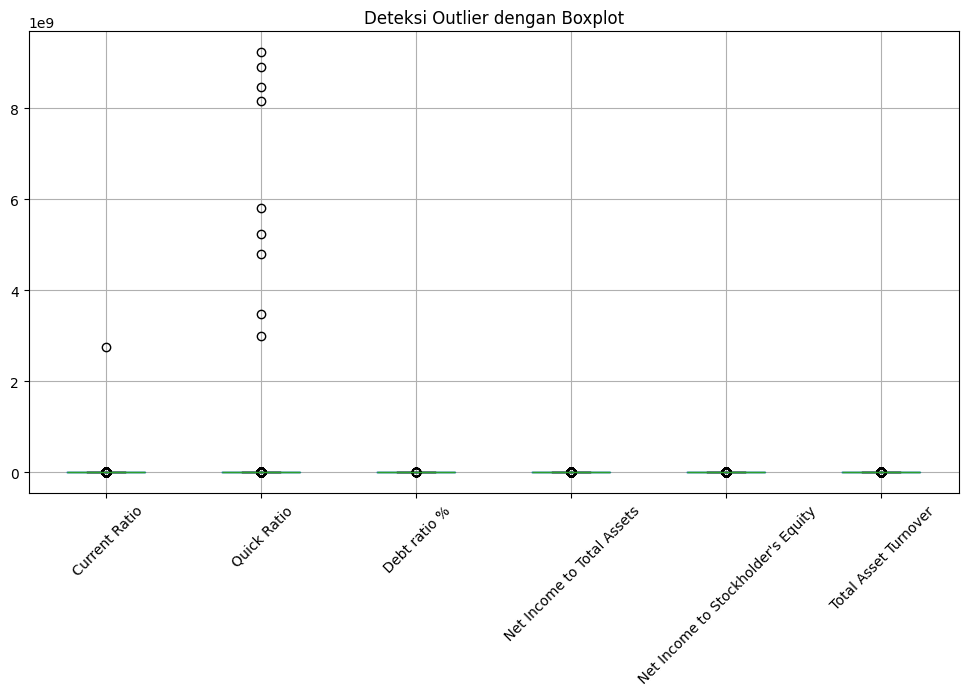

In [ ]:
X.boxplot(figsize=(12,6))
plt.xticks(rotation=45)
plt.title("Deteksi Outlier dengan Boxplot")
plt.show()

In [ ]:
outlier = df[(X[' Current Ratio'] > 1) | (X[' Quick Ratio'] > 1)]
print(outlier)

       Current Ratio   Quick Ratio   Debt ratio %  \
2119    7.644282e-03  3.490000e+09       0.186414   
2147    8.190926e-03  9.230000e+09       0.164828   
2226    8.358788e-03  8.480000e+09       0.150407   
2257    6.369403e-03  8.170000e+09       0.160565   
2306    6.703255e-03  5.800000e+09       0.142123   
2336    8.361908e-03  8.920000e+09       0.217160   
2355    6.857389e-03  4.800000e+09       0.103546   
2406    1.196502e-02  5.240000e+09       0.146900   
2409    7.492644e-03  2.990000e+09       0.228316   
2499    2.750000e+09  1.466025e-04       0.042567   

       Net Income to Total Assets   Net Income to Stockholder's Equity  \
2119                     0.811535                             0.841980   
2147                     0.728265                             0.832983   
2226                     0.796859                             0.840126   
2257                     0.745278                             0.834922   
2306                     0.800397             

In [ ]:
# Drop baris yang mau dibuang
rows_to_drop = [2499, 2119, 2147, 2226, 2257, 2306, 2336, 2355, 2406, 2409]
df_clean = df.drop(index=rows_to_drop).reset_index(drop=True)

# Pisahkan lagi
X_clean= df_clean[[" Current Ratio"," Quick Ratio"," Debt ratio %"," Net Income to Total Assets"," Net Income to Stockholder's Equity"," Total Asset Turnover"]]
Y_clean = df_clean[['Bankrupt?']]

print(X_clean.shape, Y_clean.shape)

(6809, 6) (6809, 1)


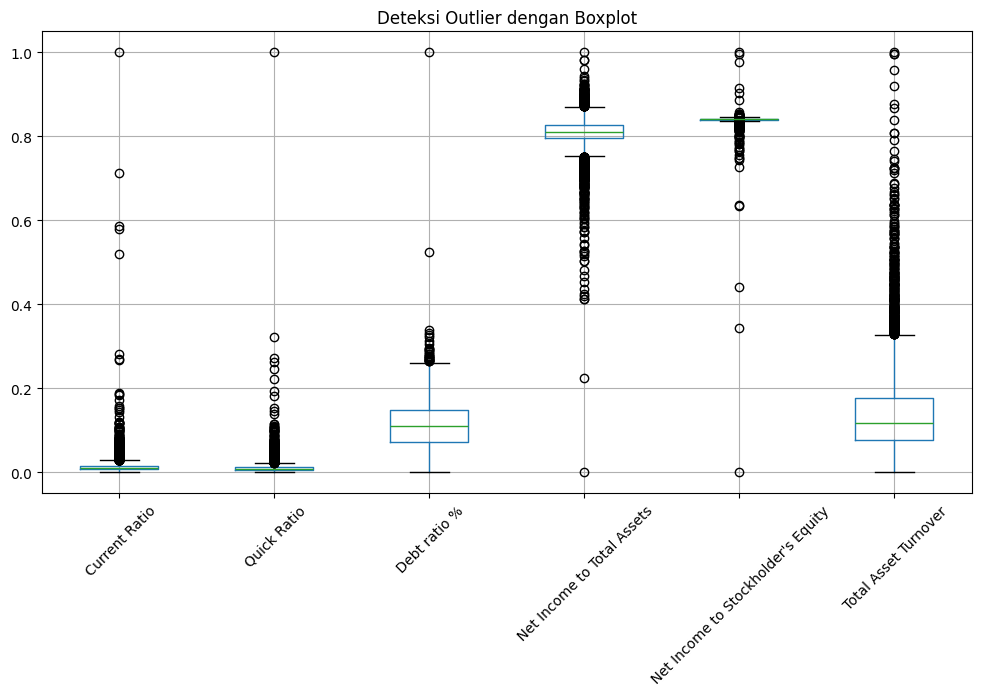

In [ ]:
X_clean.boxplot(figsize=(12,6))
plt.xticks(rotation=45)
plt.title("Deteksi Outlier dengan Boxplot")
plt.show()

### Melihat Distribusi Data

/tmp/ipython-input-761318405.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Bankrupt?', data=Y, palette='pastel')


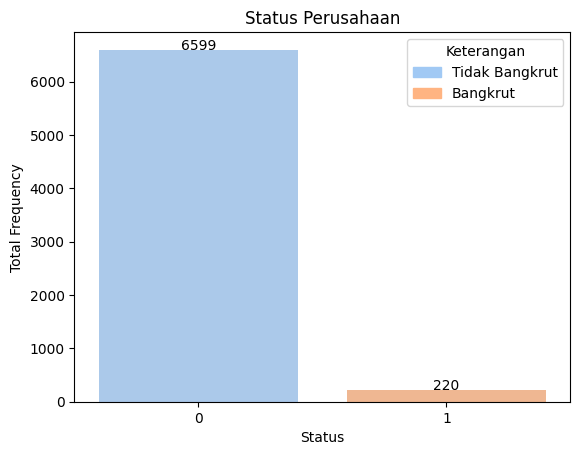

In [ ]:
ax = sns.countplot(x='Bankrupt?', data=Y, palette='pastel')

plt.title('Status Perusahaan')
plt.xlabel('Status')
plt.ylabel('Total Frequency')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() + 1,
            int(p.get_height()),
            ha='center')

legend_labels = {
    0: "Bangkrut",
    1: "Tidak Bangkrut"
}

handles = [mpatches.Patch(color=col, label=legend_labels[val])
           for val, col in zip(df['Bankrupt?'].unique(), sns.color_palette('pastel'))]

plt.legend(handles=handles, title="Keterangan")

plt.show()

In [ ]:
print((df['Bankrupt?'].value_counts(normalize=True)*100).round(2).astype(str)+"%")

Bankrupt?
0    96.77%
1     3.23%
Name: proportion, dtype: object


/tmp/ipython-input-3862951729.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Bankrupt?', data=Y_clean, palette='pastel')


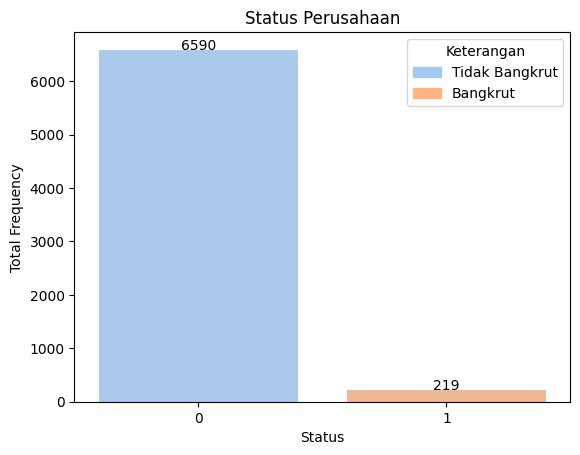

In [ ]:
# Plot distribusi kelas dengan seaborn
ax = sns.countplot(x='Bankrupt?', data=Y_clean, palette='pastel')

plt.title('Status Perusahaan')
plt.xlabel('Status')
plt.ylabel('Total Frequency')

# Tambahkan keterangan di atas setiap batang
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() + 1,
            int(p.get_height()),
            ha='center')

plt.legend(handles=handles, title="Keterangan")

plt.show()

/tmp/ipython-input-4207330334.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Bankrupt?', data=Y_clean, palette='pastel')


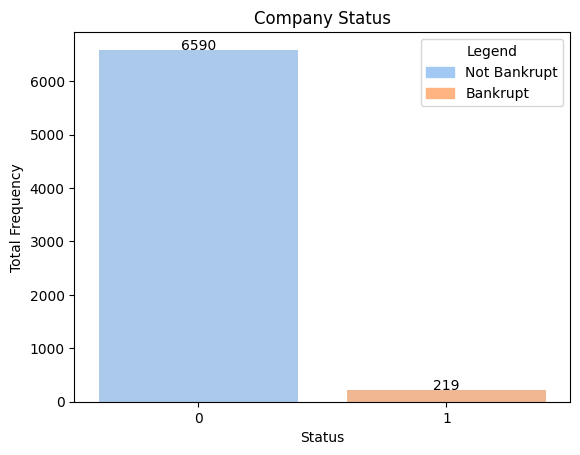

In [ ]:
# Plot distribusi kelas dengan seaborn
ax = sns.countplot(x='Bankrupt?', data=Y_clean, palette='pastel')

plt.title('Company Status')
plt.xlabel('Status')
plt.ylabel('Total Frequency')

# Tambahkan keterangan di atas setiap batang
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() + 1,
            int(p.get_height()),
            ha='center')

legend_labels1 = {
    0: "Bankrupt",
    1: "Not Bankrupt"
}

handles1 = [mpatches.Patch(color=col, label=legend_labels1[val])
           for val, col in zip(df['Bankrupt?'].unique(), sns.color_palette('pastel'))]

plt.legend(handles=handles1, title="Legend")

plt.show()

In [ ]:
print((Y_clean['Bankrupt?'].value_counts(normalize=True)*100).round(2).astype(str)+"%")

Bankrupt?
0    96.78%
1     3.22%
Name: proportion, dtype: object


In [ ]:
df_clean.head()

,Current Ratio,Quick Ratio,Debt ratio %,Net Income to Total Assets,Net Income to Stockholder's Equity,Total Asset Turnover,Bankrupt?
0,0.002259,0.001208,0.207576,0.716845,0.827890,0.086957,1
1,0.006016,0.004039,0.171176,0.795297,0.839969,0.064468,1
2,0.011543,0.005348,0.207516,0.774670,0.836774,0.014993,1
3,0.004194,0.002896,0.151465,0.739555,0.834697,0.089955,1
4,0.006022,0.003727,0.106509,0.795016,0.839973,0.175412,1


In [ ]:
df_clean.tail()

,Current Ratio,Quick Ratio,Debt ratio %,Net Income to Total Assets,Net Income to Stockholder's Equity,Total Asset Turnover,Bankrupt?
6804,0.010451,0.005457,0.124618,0.799927,0.840359,0.103448,0
6805,0.009259,0.006741,0.099253,0.799748,0.840306,0.103448,0
6806,0.038424,0.035112,0.038939,0.797778,0.840138,0.106447,0
6807,0.012782,0.007256,0.086979,0.811808,0.841084,0.109445,0
6808,0.051348,0.040897,0.014149,0.815956,0.841019,0.002999,0


# Model

### Splitting Data 90:10

In [ ]:
X_train90, X_test90, Y_train90, Y_test90 = train_test_split(X_clean, Y_clean, test_size=0.1, stratify=Y_clean, random_state=42)

In [ ]:
print(Y_train90.value_counts())

Bankrupt?
0            5931
1             197
Name: count, dtype: int64


In [ ]:
print(Y_test90.value_counts())

Bankrupt?
0            659
1             22
Name: count, dtype: int64


### TANPA SMOTE & ADASYN

In [ ]:
#Train model
rf_nores90 = RandomForestClassifier(random_state=42,max_features=2)
rf_nores90.fit(X_train90, Y_train90)

#Prediksi
Y_pred_nores90 = rf_nores90.predict(X_test90)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
# Ambil kedalaman setiap pohon
depths90_nores = [estimator.tree_.max_depth for estimator in rf_nores90.estimators_]

# Tampilkan
for i, depth90_nores in enumerate(depths90_nores):
    print(f"Pohon ke-{i+1}: depth = {depth90_nores}")

# Ringkasan statistik
print("Kedalaman maksimum:", max(depths90_nores))
print("Kedalaman minimum:", min(depths90_nores))

Pohon ke-1: depth = 15
Pohon ke-2: depth = 19
Pohon ke-3: depth = 18
Pohon ke-4: depth = 17
Pohon ke-5: depth = 19
Pohon ke-6: depth = 19
Pohon ke-7: depth = 15
Pohon ke-8: depth = 17
Pohon ke-9: depth = 17
Pohon ke-10: depth = 21
Pohon ke-11: depth = 17
Pohon ke-12: depth = 16
Pohon ke-13: depth = 18
Pohon ke-14: depth = 21
Pohon ke-15: depth = 17
Pohon ke-16: depth = 17
Pohon ke-17: depth = 16
Pohon ke-18: depth = 14
Pohon ke-19: depth = 19
Pohon ke-20: depth = 18
Pohon ke-21: depth = 15
Pohon ke-22: depth = 18
Pohon ke-23: depth = 21
Pohon ke-24: depth = 17
Pohon ke-25: depth = 20
Pohon ke-26: depth = 17
Pohon ke-27: depth = 18
Pohon ke-28: depth = 15
Pohon ke-29: depth = 16
Pohon ke-30: depth = 16
Pohon ke-31: depth = 18
Pohon ke-32: depth = 16
Pohon ke-33: depth = 22
Pohon ke-34: depth = 22
Pohon ke-35: depth = 18
Pohon ke-36: depth = 15
Pohon ke-37: depth = 15
Pohon ke-38: depth = 16
Pohon ke-39: depth = 20
Pohon ke-40: depth = 17
Pohon ke-41: depth = 14
Pohon ke-42: depth = 17
P

Accuracy : 0.9633
Precision: 0.3333
Recall   : 0.1364
F1-Score : 0.1935


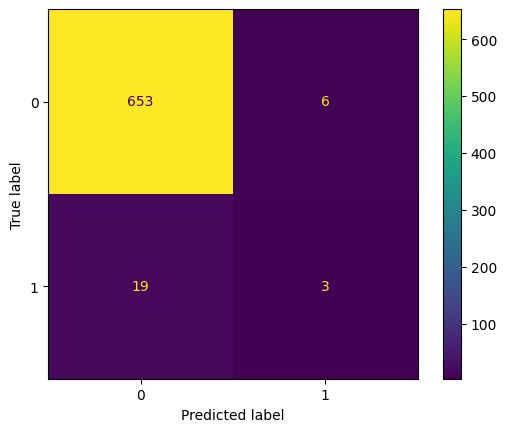

In [ ]:
#Hitung nilai evaluasi
accuracy_nores90 = accuracy_score(Y_test90, Y_pred_nores90)
precision_nores90 = precision_score(Y_test90, Y_pred_nores90,zero_division=0)
recall_nores90 = recall_score(Y_test90, Y_pred_nores90)
f1_nores90 = f1_score(Y_test90, Y_pred_nores90)

cm_nores90 = confusion_matrix(Y_test90, Y_pred_nores90)
ConfusionMatrixDisplay(confusion_matrix=cm_nores90).plot();

print(f"Accuracy : {accuracy_nores90:.4f}")
print(f"Precision: {precision_nores90:.4f}")
print(f"Recall   : {recall_nores90:.4f}")
print(f"F1-Score : {f1_nores90:.4f}")

### SMOTE

In [ ]:
#Oversampling SMOTE di training data
smote90 = SMOTE(random_state=42)
XSmote_train90, YSmote_train90 = smote90.fit_resample(X_train90, Y_train90)

In [ ]:
print(YSmote_train90.value_counts())

Bankrupt?
0            5931
1            5931
Name: count, dtype: int64


In [ ]:
Y_train90_series = Y_train90.iloc[:, 0]
X_min90 = X_train90.loc[Y_train90_series == 1].reset_index(drop=True)

# Tetapkan jumlah tetangga
k = 5
nn = NearestNeighbors(n_neighbors=k+1)  # +1 karena titik itu sendiri ikut
nn.fit(X_min90)

# Contoh: ambil 3 data minoritas acak
np.random.seed(42)
indices = np.random.choice(len(X_min90), 3, replace=False)

for idx in indices:
    sample = X_min90.iloc[idx].values
    neighbors = nn.kneighbors([sample], return_distance=False).flatten()[1:]  # skip diri sendiri
    chosen_neighbor_idx = np.random.choice(neighbors)
    neighbor_sample = X_min90.iloc[chosen_neighbor_idx].values
    gap = np.random.rand()
    synthetic = sample + gap * (neighbor_sample - sample)

    print("Data yang Dipilih:", sample)
    print("Tetangga Terpilih:", neighbor_sample)
    print("Gap:", gap)
    print("Data Sintetis:", synthetic)
    print("="*100)

Data yang Dipilih: [0.07591739 0.07300555 0.01680926 0.68988026 0.83480436 0.04497751]
Tetangga Terpilih: [0.0188873  0.01123038 0.10112767 0.71361252 0.83423512 0.04497751]
Gap: 0.712270589924442
Data Sintetis: [0.03529654 0.02900491 0.07686679 0.70678405 0.83439891 0.04497751]
Data yang Dipilih: [0.00713882 0.00611738 0.19403211 0.78507113 0.83858795 0.31334333]
Tetangga Terpilih: [0.00656285 0.00488467 0.21755298 0.73499852 0.82951484 0.26536732]
Gap: 0.2848404943774676
Data Sintetis: [0.00697476 0.00576625 0.2007318  0.77080843 0.83600356 0.29967782]
Data yang Dipilih: [0.00870325 0.00208924 0.19696466 0.79950154 0.84052909 0.09295352]
Tetangga Terpilih: [0.00496473 0.00351472 0.18895305 0.79850572 0.84036635 0.09445277]
Gap: 0.266781014275285
Data Sintetis: [0.00770588 0.00246953 0.19482731 0.79923588 0.84048567 0.09335349]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [ ]:
#Data Asli Xi
print('Mencari Variabel X')
print(XSmote_train90[np.isclose(XSmote_train90.iloc[:, 0], 0.00713882   , atol=1e-6)])
print('=' * 100)
print('Variabel X')
print(XSmote_train90.iloc[[3452]])
print('=' * 100)
print('Variabel Y')
print(YSmote_train90.iloc[[3452]])

Mencari Variabel X
      Current Ratio  Quick Ratio  Debt ratio %  Net Income to Total Assets  \
2951       0.007139     0.005065      0.169937                    0.799124   
3452       0.007139     0.006117      0.194032                    0.785071   
4516       0.007138     0.001816      0.022493                    0.739674   
5835       0.007139     0.004087      0.181879                    0.821412   
6001       0.007139     0.000155      0.125495                    0.799345   

      Net Income to Stockholder's Equity  Total Asset Turnover  
2951                            0.840385              0.194903  
3452                            0.838588              0.313343  
4516                            0.837205              0.023988  
5835                            0.843086              0.083958  
6001                            0.840314              0.014993  
Variabel X
      Current Ratio  Quick Ratio  Debt ratio %  Net Income to Total Assets  \
3452       0.007139     0.006117 

In [ ]:
#Data Terdekat
print('Mencari Variabel X')
print(XSmote_train90[np.isclose(XSmote_train90.iloc[:, 0], 0.00656285  , atol=1e-6)])
print('=======================================================================')
print('Variabel X')
print(XSmote_train90.iloc[[2017]])
print('=======================================================================')
print('Variabel Y')
print(YSmote_train90.iloc[[2017]])

Mencari Variabel X
      Current Ratio  Quick Ratio  Debt ratio %  Net Income to Total Assets  \
720        0.006563     0.004556      0.185083                    0.769318   
2017       0.006563     0.004885      0.217553                    0.734999   
6167       0.006562     0.004955      0.199115                    0.806985   
8252       0.006563     0.003683      0.188240                    0.774563   
9005       0.006562     0.002212      0.166763                    0.776611   
9938       0.006562     0.004525      0.125686                    0.779519   

      Net Income to Stockholder's Equity  Total Asset Turnover  
720                             0.836766              0.196402  
2017                            0.829515              0.265367  
6167                            0.841856              0.147712  
8252                            0.837294              0.105238  
9005                            0.837962              0.052450  
9938                            0.838715    

In [ ]:
#Data Sintetis
print('Variabel X')
print(XSmote_train90[np.isclose(XSmote_train90.iloc[:, 0], 0.00697476  , atol=1e-6)])
print('=======================================================================')
print('Variabel Y')
print(YSmote_train90.iloc[[8765]])

Variabel X
      Current Ratio  Quick Ratio  Debt ratio %  Net Income to Total Assets  \
8765       0.006974     0.004502      0.183519                    0.771266   

      Net Income to Stockholder's Equity  Total Asset Turnover  
8765                            0.837028              0.194059  
Variabel Y
8765    1
Name: Bankrupt?, dtype: int64


In [ ]:
#Train model
rf_smote90 = RandomForestClassifier(random_state=42)
rf_smote90.fit(XSmote_train90, YSmote_train90)

#Prediksi
Y_pred_smote90 = rf_smote90.predict(X_test90)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
# Ambil kedalaman setiap pohon
depths90_smote = [estimator.tree_.max_depth for estimator in rf_smote90.estimators_]

# Tampilkan
for i, depth90_smote in enumerate(depths90_smote):
    print(f"Pohon ke-{i+1}: depth = {depth90_smote}")

# Ringkasan statistik
print("Kedalaman maksimum:", max(depths90_smote))
print("Kedalaman minimum:", min(depths90_smote))
print("Kedalaman rata-rata:", sum(depths90_smote)/len(depths90_smote))

Pohon ke-1: depth = 27
Pohon ke-2: depth = 28
Pohon ke-3: depth = 24
Pohon ke-4: depth = 29
Pohon ke-5: depth = 24
Pohon ke-6: depth = 25
Pohon ke-7: depth = 24
Pohon ke-8: depth = 25
Pohon ke-9: depth = 26
Pohon ke-10: depth = 33
Pohon ke-11: depth = 24
Pohon ke-12: depth = 29
Pohon ke-13: depth = 30
Pohon ke-14: depth = 30
Pohon ke-15: depth = 26
Pohon ke-16: depth = 26
Pohon ke-17: depth = 22
Pohon ke-18: depth = 25
Pohon ke-19: depth = 34
Pohon ke-20: depth = 23
Pohon ke-21: depth = 25
Pohon ke-22: depth = 22
Pohon ke-23: depth = 31
Pohon ke-24: depth = 28
Pohon ke-25: depth = 29
Pohon ke-26: depth = 31
Pohon ke-27: depth = 24
Pohon ke-28: depth = 26
Pohon ke-29: depth = 30
Pohon ke-30: depth = 29
Pohon ke-31: depth = 29
Pohon ke-32: depth = 29
Pohon ke-33: depth = 25
Pohon ke-34: depth = 22
Pohon ke-35: depth = 28
Pohon ke-36: depth = 25
Pohon ke-37: depth = 27
Pohon ke-38: depth = 27
Pohon ke-39: depth = 24
Pohon ke-40: depth = 26
Pohon ke-41: depth = 25
Pohon ke-42: depth = 22
P

In [ ]:
print(YSmote_train90.value_counts())

Bankrupt?
0    5931
1    5931
Name: count, dtype: int64


Accuracy : 0.9383
Precision: 0.2826
Recall   : 0.5909
F1-Score : 0.3824
Train Accuracy: 1.0000
Test Accuracy : 0.9383


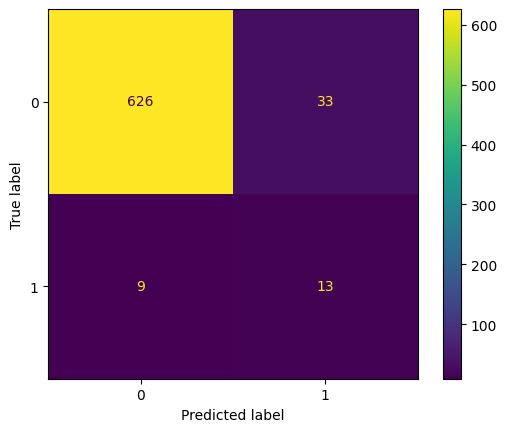

In [ ]:
#Hitung nilai evaluasi
accuracy_smote90 = accuracy_score(Y_test90, Y_pred_smote90)
precision_smote90 = precision_score(Y_test90, Y_pred_smote90, zero_division=0)
recall_smote90 = recall_score(Y_test90, Y_pred_smote90)
f1_smote90 = f1_score(Y_test90, Y_pred_smote90)

# Create the confusion matrix
cm_smote90 = confusion_matrix(Y_test90, Y_pred_smote90)

ConfusionMatrixDisplay(confusion_matrix=cm_smote90).plot();

#Tampilkan nilai
print(f"Accuracy : {accuracy_smote90:.4f}")
print(f"Precision: {precision_smote90:.4f}")
print(f"Recall   : {recall_smote90:.4f}")
print(f"F1-Score : {f1_smote90:.4f}")

### ADASYN

In [ ]:
#Oversampling ADASYN di training data
adasyn90 = ADASYN(random_state=42)
XAdasyn_train90, YAdasyn_train90 = adasyn90.fit_resample(X_train90, Y_train90)

#Train model
rf_adasyn90 = RandomForestClassifier(random_state=42)
rf_adasyn90.fit(XAdasyn_train90, YAdasyn_train90)

#Prediksi
Y_pred_adasyn90 = rf_adasyn90.predict(X_test90)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
print(YAdasyn_train90.value_counts())

Bankrupt?
0            5931
1            5917
Name: count, dtype: int64


In [ ]:
# Ambil minoritas asli
X_min_adasyn = X_train90.loc[Y_train90_series == 1].reset_index(drop=True)

# NearestNeighbors dari minoritas asli
k = 5
nbrs = NearestNeighbors(n_neighbors=k+1, metric='euclidean').fit(X_min_adasyn)

distances, indices = nbrs.kneighbors(X_min_adasyn)

Delta = []
for neigh_idx_list in indices:
    neigh_idx_list = neigh_idx_list[1:]
    # Ambil label tetangga dari data training asli
    neighbor_labels = Y_train90_series.iloc[neigh_idx_list]
    delta_i = np.sum(neighbor_labels == 0)  # jumlah tetangga mayoritas
    Delta.append(delta_i)

Delta = np.array(Delta)
ri = Delta / k
ri_normalized = ri / ri.sum()

for i in range(len(X_min_adasyn)):
    print(f"Sampel minoritas ke-{i}: Δi = {Delta[i]}, k = {k}, ri = {ri[i]:.4f}, ri_normalized = {ri_normalized[i]:.4f}")


Sampel minoritas ke-0: Δi = 5, k = 5, ri = 1.0000, ri_normalized = 0.0052
Sampel minoritas ke-1: Δi = 5, k = 5, ri = 1.0000, ri_normalized = 0.0052
Sampel minoritas ke-2: Δi = 5, k = 5, ri = 1.0000, ri_normalized = 0.0052
Sampel minoritas ke-3: Δi = 5, k = 5, ri = 1.0000, ri_normalized = 0.0052
Sampel minoritas ke-4: Δi = 5, k = 5, ri = 1.0000, ri_normalized = 0.0052
Sampel minoritas ke-5: Δi = 5, k = 5, ri = 1.0000, ri_normalized = 0.0052
Sampel minoritas ke-6: Δi = 4, k = 5, ri = 0.8000, ri_normalized = 0.0041
Sampel minoritas ke-7: Δi = 5, k = 5, ri = 1.0000, ri_normalized = 0.0052
Sampel minoritas ke-8: Δi = 4, k = 5, ri = 0.8000, ri_normalized = 0.0041
Sampel minoritas ke-9: Δi = 5, k = 5, ri = 1.0000, ri_normalized = 0.0052
Sampel minoritas ke-10: Δi = 5, k = 5, ri = 1.0000, ri_normalized = 0.0052
Sampel minoritas ke-11: Δi = 4, k = 5, ri = 0.8000, ri_normalized = 0.0041
Sampel minoritas ke-12: Δi = 5, k = 5, ri = 1.0000, ri_normalized = 0.0052
Sampel minoritas ke-13: Δi = 5, k =

In [ ]:
#Sigma Ri
sigma_ri = ri.sum()

print("Sigma ri =", sigma_ri)

Sigma ri = 194.0


In [ ]:
X_min_adasyn = X_train90.loc[Y_train90_series == 1].reset_index(drop=True)
X_maj_adasyn = X_train90.loc[Y_train90_series == 0].reset_index(drop=True)

beta = 1

G_total = int(len(X_min_adasyn) * beta)

nn = NearestNeighbors(n_neighbors=k+1, metric='euclidean')
nn.fit(X_train90.values)

r_list = []
for sample in X_min_adasyn.values:
    neighbors_idx = nn.kneighbors([sample], return_distance=False).flatten()[1:]
    y_neighbors = Y_train90_series.iloc[neighbors_idx].values
    r_i = np.sum(y_neighbors == 0) / k
    r_list.append(r_i)

r_array = np.array(r_list)
r_sum = np.sum(r_array)
if r_sum == 0:
    G_i_array = np.ones(len(r_array)) * (G_total / len(r_array))
else:
    G_i_array = (r_array / r_sum) * G_total

synthetic_samples = []
print("Contoh pembangkitan data sintetis ADASYN:\n")
for idx, sample in enumerate(X_min_adasyn.values):
    if G_i_array[idx] < 1:
        continue
    neighbors_idx = nn.kneighbors([sample], return_distance=False).flatten()[1:]
    neighbors_min = [n for n in neighbors_idx if Y_train90_series.iloc[n] == 1]
    if len(neighbors_min) == 0:
        continue
    for _ in range(int(G_i_array[idx])):
        chosen_neighbor_idx = np.random.choice(neighbors_min)
        neighbor_sample = X_train90.iloc[chosen_neighbor_idx].values
        gap = np.random.rand()
        synthetic = sample + gap * (neighbor_sample - sample)

        print(f"Data asli       : {sample}")
        print(f"Data tetangga   : {neighbor_sample}")
        print(f"Nilai gap       : {gap:.4f}")
        print(f"Data sintetis   : {synthetic}")
        print("=" * 80)

        synthetic_samples.append(synthetic)

Contoh pembangkitan data sintetis ADASYN:

Data asli       : [1.81715502e-03 2.37683206e-04 1.84962361e-01 7.28648941e-01
 8.31773761e-01 4.49775112e-02]
Data tetangga   : [0.00270576 0.00283411 0.19578559 0.71960325 0.8296673  0.04347826]
Nilai gap       : 0.9766
Data sintetis   : [0.00268498 0.00277339 0.19553249 0.71981478 0.82971656 0.04351332]
Data asli       : [0.00767236 0.00302188 0.18278562 0.7883022  0.83911915 0.18590705]
Data tetangga   : [0.00919373 0.00420968 0.17507634 0.78178525 0.83844079 0.1814093 ]
Nilai gap       : 0.4110
Data sintetis   : [0.0082977  0.00351011 0.17961682 0.78562349 0.83884032 0.1840583 ]
Data asli       : [0.00496473 0.00351472 0.18895305 0.79850572 0.84036635 0.09445277]
Data tetangga   : [0.00870325 0.00208924 0.19696466 0.79950154 0.84052909 0.09295352]
Nilai gap       : 0.0331
Data sintetis   : [0.00508829 0.0034676  0.18921784 0.79853864 0.84037173 0.09440322]
Data asli       : [0.0064861  0.00430512 0.21443904 0.74851356 0.83215505 0.2818590

In [ ]:
#Data Asli Xi
print('Mencari Variabel X')
print(XAdasyn_train90[np.isclose(XAdasyn_train90.iloc[:, 0],0.0064861, atol=1e-6)])
print('=======================================================================')
print('Variabel X')
print(XAdasyn_train90.iloc[[424]])
print('=======================================================================')
print('Variabel Y')
print(YAdasyn_train90.iloc[[424]])

Mencari Variabel X
      Current Ratio  Quick Ratio  Debt ratio %  Net Income to Total Assets  \
424        0.006486     0.004305      0.214439                    0.748514   
5651       0.006487     0.005938      0.169030                    0.834690   
6519       0.006487     0.004248      0.213456                    0.750476   
9093       0.006487     0.004248      0.213460                    0.750467   

      Net Income to Stockholder's Equity  Total Asset Turnover  
424                             0.832155              0.281859  
5651                            0.844211              0.241379  
6519                            0.832481              0.283152  
9093                            0.832479              0.283146  
Variabel X
     Current Ratio  Quick Ratio  Debt ratio %  Net Income to Total Assets  \
424       0.006486     0.004305      0.214439                    0.748514   

     Net Income to Stockholder's Equity  Total Asset Turnover  
424                            0.83

In [ ]:
#Data Terdekat Xi
print('Mencari Variabel X')
print(XAdasyn_train90[np.isclose(XAdasyn_train90.iloc[:, 0],0.00656285, atol=1e-6)])
print('=======================================================================')
print('Variabel X')
print(XAdasyn_train90.iloc[[2017]])
print('=======================================================================')
print('Variabel Y')
print(YAdasyn_train90.iloc[[2017]])

Mencari Variabel X
      Current Ratio  Quick Ratio  Debt ratio %  Net Income to Total Assets  \
720        0.006563     0.004556      0.185083                    0.769318   
2017       0.006563     0.004885      0.217553                    0.734999   
7832       0.006563     0.004753      0.188561                    0.795114   

      Net Income to Stockholder's Equity  Total Asset Turnover  
720                             0.836766              0.196402  
2017                            0.829515              0.265367  
7832                            0.839928              0.137152  
Variabel X
      Current Ratio  Quick Ratio  Debt ratio %  Net Income to Total Assets  \
2017       0.006563     0.004885      0.217553                    0.734999   

      Net Income to Stockholder's Equity  Total Asset Turnover  
2017                            0.829515              0.265367  
Variabel Y
      Bankrupt?
2017          1


In [ ]:
#Data Sintetis
print('Mencari Variabel X')
print(XAdasyn_train90[np.isclose(XAdasyn_train90.iloc[:, 0],0.00519737, atol=1e-6)])
print('=======================================================================')
print('Variabel X')
print(XAdasyn_train90.iloc[[8013]])
print('=======================================================================')
print('Variabel Y')
print(YAdasyn_train90.iloc[[8013]])

Mencari Variabel X
Empty DataFrame
Columns: [ Current Ratio,  Quick Ratio,  Debt ratio %,  Net Income to Total Assets,  Net Income to Stockholder's Equity,  Total Asset Turnover]
Index: []
Variabel X
      Current Ratio  Quick Ratio  Debt ratio %  Net Income to Total Assets  \
8013       0.006512     0.004504      0.215508                    0.743875   

      Net Income to Stockholder's Equity  Total Asset Turnover  
8013                            0.831249              0.276199  
Variabel Y
      Bankrupt?
8013          1


In [ ]:
# Ambil kedalaman setiap pohon
depths90_adasyn = [estimator.tree_.max_depth for estimator in rf_adasyn90.estimators_]

# Tampilkan
for i, depth90_adasyn in enumerate(depths90_adasyn):
    print(f"Pohon ke-{i+1}: depth = {depth90_adasyn}")

# Ringkasan statistik
print("Kedalaman maksimum:", max(depths90_adasyn))
print("Kedalaman minimum:", min(depths90_adasyn))
print("Kedalaman rata-rata:", sum(depths90_adasyn)/len(depths90_adasyn))

Pohon ke-1: depth = 27
Pohon ke-2: depth = 28
Pohon ke-3: depth = 29
Pohon ke-4: depth = 24
Pohon ke-5: depth = 26
Pohon ke-6: depth = 35
Pohon ke-7: depth = 25
Pohon ke-8: depth = 24
Pohon ke-9: depth = 28
Pohon ke-10: depth = 27
Pohon ke-11: depth = 25
Pohon ke-12: depth = 24
Pohon ke-13: depth = 26
Pohon ke-14: depth = 24
Pohon ke-15: depth = 36
Pohon ke-16: depth = 27
Pohon ke-17: depth = 24
Pohon ke-18: depth = 26
Pohon ke-19: depth = 32
Pohon ke-20: depth = 25
Pohon ke-21: depth = 28
Pohon ke-22: depth = 31
Pohon ke-23: depth = 28
Pohon ke-24: depth = 27
Pohon ke-25: depth = 28
Pohon ke-26: depth = 27
Pohon ke-27: depth = 24
Pohon ke-28: depth = 35
Pohon ke-29: depth = 30
Pohon ke-30: depth = 24
Pohon ke-31: depth = 29
Pohon ke-32: depth = 29
Pohon ke-33: depth = 27
Pohon ke-34: depth = 29
Pohon ke-35: depth = 33
Pohon ke-36: depth = 28
Pohon ke-37: depth = 26
Pohon ke-38: depth = 31
Pohon ke-39: depth = 23
Pohon ke-40: depth = 28
Pohon ke-41: depth = 27
Pohon ke-42: depth = 24
P

In [ ]:
print(YAdasyn_train90.value_counts())

Bankrupt?
0    5931
1    5917
Name: count, dtype: int64


Accuracy : 0.9295
Precision: 0.2500
Recall   : 0.5909
F1-Score : 0.3514
Train Accuracy: 1.0000
Test Accuracy : 0.9295


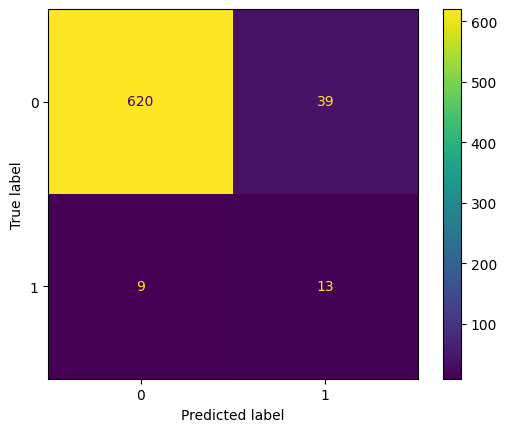

In [ ]:
#Hitung nilai evaluasi
accuracy_adasyn90 = accuracy_score(Y_test90, Y_pred_adasyn90)
precision_adasyn90 = precision_score(Y_test90, Y_pred_adasyn90, zero_division=0)
recall_adasyn90 = recall_score(Y_test90, Y_pred_adasyn90)
f1_adasyn90 = f1_score(Y_test90, Y_pred_adasyn90)

#Create the confusion matrix
cm_adasyn90 = confusion_matrix(Y_test90, Y_pred_adasyn90)

ConfusionMatrixDisplay(confusion_matrix=cm_adasyn90).plot();

#Tampilkan nilai
print(f"Accuracy : {accuracy_adasyn90:.4f}")
print(f"Precision: {precision_adasyn90:.4f}")
print(f"Recall   : {recall_adasyn90:.4f}")
print(f"F1-Score : {f1_adasyn90:.4f}")

### Splitting Data 80:20

In [ ]:
X_train80, X_test80, Y_train80, Y_test80 = train_test_split(X_clean, Y_clean, test_size=0.2, stratify=Y_clean,random_state=42)

In [ ]:
print(len(X_train80))
print(len(X_test80))

5447
1362


In [ ]:
print(Y_train80.value_counts())

Bankrupt?
0    5272
1     175
Name: count, dtype: int64


In [ ]:
print(Y_test80.value_counts())

Bankrupt?
0    1318
1      44
Name: count, dtype: int64


### TANPA SMOTE & ADASYN

In [ ]:
#Train model
rf_nores80 = RandomForestClassifier(random_state=42)
rf_nores80.fit(X_train80, Y_train80)

#Prediksi
Y_pred_nores80 = rf_nores80.predict(X_test80)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
# Ambil kedalaman setiap pohon
depths80_nores = [estimator.tree_.max_depth for estimator in rf_nores80.estimators_]

# Tampilkan
for i, depth80_nores in enumerate(depths80_nores):
    print(f"Pohon ke-{i+1}: depth = {depth80_nores}")

# Ringkasan statistik
print("Kedalaman maksimum:", max(depths80_nores))
print("Kedalaman minimum:", min(depths80_nores))
print("Kedalaman rata-rata:", sum(depths80_nores)/len(depths80_nores))

Pohon ke-1: depth = 15
Pohon ke-2: depth = 16
Pohon ke-3: depth = 18
Pohon ke-4: depth = 21
Pohon ke-5: depth = 18
Pohon ke-6: depth = 16
Pohon ke-7: depth = 16
Pohon ke-8: depth = 19
Pohon ke-9: depth = 17
Pohon ke-10: depth = 17
Pohon ke-11: depth = 18
Pohon ke-12: depth = 21
Pohon ke-13: depth = 16
Pohon ke-14: depth = 21
Pohon ke-15: depth = 15
Pohon ke-16: depth = 18
Pohon ke-17: depth = 14
Pohon ke-18: depth = 17
Pohon ke-19: depth = 18
Pohon ke-20: depth = 18
Pohon ke-21: depth = 14
Pohon ke-22: depth = 18
Pohon ke-23: depth = 18
Pohon ke-24: depth = 14
Pohon ke-25: depth = 17
Pohon ke-26: depth = 15
Pohon ke-27: depth = 15
Pohon ke-28: depth = 16
Pohon ke-29: depth = 15
Pohon ke-30: depth = 17
Pohon ke-31: depth = 14
Pohon ke-32: depth = 19
Pohon ke-33: depth = 22
Pohon ke-34: depth = 19
Pohon ke-35: depth = 18
Pohon ke-36: depth = 16
Pohon ke-37: depth = 20
Pohon ke-38: depth = 15
Pohon ke-39: depth = 17
Pohon ke-40: depth = 18
Pohon ke-41: depth = 16
Pohon ke-42: depth = 19
P

Accuracy : 0.9692
Precision: 0.5625
Recall   : 0.2045
F1-Score : 0.3000


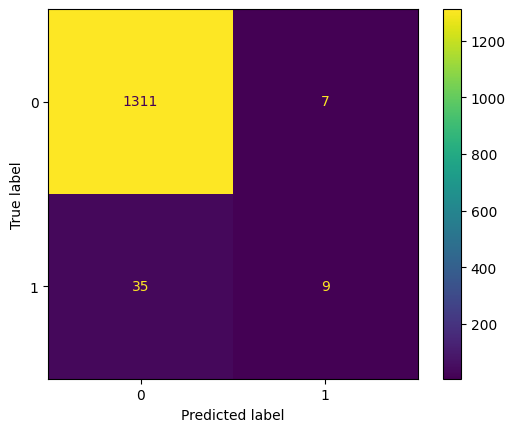

In [ ]:
#Hitung nilai evaluasi
accuracy_nores80 = accuracy_score(Y_test80, Y_pred_nores80)
precision_nores80 = precision_score(Y_test80, Y_pred_nores80, zero_division=0)
recall_nores80 = recall_score(Y_test80, Y_pred_nores80)
f1_nores80 = f1_score(Y_test80, Y_pred_nores80)

# Create the confusion matrix
cm_nores80 = confusion_matrix(Y_test80, Y_pred_nores80)
ConfusionMatrixDisplay(confusion_matrix=cm_nores80).plot();

#Tampilkan nilai
print(f"Accuracy : {accuracy_nores80:.4f}")
print(f"Precision: {precision_nores80:.4f}")
print(f"Recall   : {recall_nores80:.4f}")
print(f"F1-Score : {f1_nores80:.4f}")

###SMOTE

In [ ]:
#Oversampling SMOTE di training data
from imblearn.over_sampling import SMOTE
smote80 = SMOTE(random_state=42)
XSmote_train80, YSmote_train80 = smote80.fit_resample(X_train80, Y_train80)

#Train model
rf_smote80 = RandomForestClassifier(random_state=42)
rf_smote80.fit(XSmote_train80, YSmote_train80)

#Prediksi
Y_pred_smote80 = rf_smote80.predict(X_test80)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
print(YSmote_train80.value_counts())

Bankrupt?
0            5272
1            5272
Name: count, dtype: int64


In [ ]:
print(rf_smote80.n_estimators)

100


In [ ]:
# Ambil kedalaman setiap pohon
depths80_smote = [estimator.tree_.max_depth for estimator in rf_smote80.estimators_]

# Tampilkan
for i, depth80_smote in enumerate(depths80_smote):
    print(f"Pohon ke-{i+1}: depth = {depth80_smote}")

# Ringkasan statistik
print("Kedalaman maksimum:", max(depths80_smote))
print("Kedalaman minimum:", min(depths80_smote))
print("Kedalaman rata-rata:", sum(depths80_smote)/len(depths80_smote))

Pohon ke-1: depth = 24
Pohon ke-2: depth = 25
Pohon ke-3: depth = 30
Pohon ke-4: depth = 29
Pohon ke-5: depth = 31
Pohon ke-6: depth = 25
Pohon ke-7: depth = 31
Pohon ke-8: depth = 26
Pohon ke-9: depth = 32
Pohon ke-10: depth = 24
Pohon ke-11: depth = 25
Pohon ke-12: depth = 23
Pohon ke-13: depth = 29
Pohon ke-14: depth = 28
Pohon ke-15: depth = 38
Pohon ke-16: depth = 29
Pohon ke-17: depth = 23
Pohon ke-18: depth = 27
Pohon ke-19: depth = 25
Pohon ke-20: depth = 34
Pohon ke-21: depth = 29
Pohon ke-22: depth = 28
Pohon ke-23: depth = 31
Pohon ke-24: depth = 30
Pohon ke-25: depth = 32
Pohon ke-26: depth = 25
Pohon ke-27: depth = 26
Pohon ke-28: depth = 22
Pohon ke-29: depth = 25
Pohon ke-30: depth = 26
Pohon ke-31: depth = 25
Pohon ke-32: depth = 25
Pohon ke-33: depth = 27
Pohon ke-34: depth = 26
Pohon ke-35: depth = 24
Pohon ke-36: depth = 27
Pohon ke-37: depth = 27
Pohon ke-38: depth = 28
Pohon ke-39: depth = 30
Pohon ke-40: depth = 27
Pohon ke-41: depth = 25
Pohon ke-42: depth = 25
P

Accuracy : 0.9435
Precision: 0.3059
Recall   : 0.5909
F1-Score : 0.4031
Train Accuracy: 0.9999
Test Accuracy : 0.9435


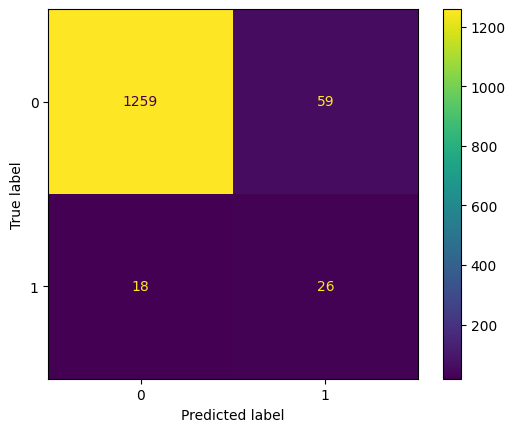

In [ ]:
#Hitung nilai evaluasi
accuracy_smote80 = accuracy_score(Y_test80, Y_pred_smote80)
precision_smote80 = precision_score(Y_test80, Y_pred_smote80, zero_division=0)
recall_smote80 = recall_score(Y_test80, Y_pred_smote80)
f1_smote80 = f1_score(Y_test80, Y_pred_smote80)

# Create the confusion matrix
cm_smote80 = confusion_matrix(Y_test80, Y_pred_smote80)

ConfusionMatrixDisplay(confusion_matrix=cm_smote80).plot();

#Tampilkan nilai
print(f"Accuracy : {accuracy_smote80:.4f}")
print(f"Precision: {precision_smote80:.4f}")
print(f"Recall   : {recall_smote80:.4f}")
print(f"F1-Score : {f1_smote80:.4f}")

###ADASYN

In [ ]:
#Oversampling ADASYN di training data
adasyn_80 = ADASYN(random_state=42)
XAdasyn_train80, YAdasyn_train80 = adasyn_80.fit_resample(X_train80, Y_train80)

#Train model
rf_adasyn80 = RandomForestClassifier(random_state=42)
rf_adasyn80.fit(XAdasyn_train80, YAdasyn_train80)

#Prediksi
Y_pred_adasyn80 = rf_adasyn80.predict(X_test80)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
print(YAdasyn_train80.value_counts())

Bankrupt?
1    5281
0    5272
Name: count, dtype: int64


In [ ]:
# Ambil kedalaman setiap pohon
depths80_adasyn = [estimator.tree_.max_depth for estimator in rf_adasyn80.estimators_]

# Tampilkan
for i, depth80_adasyn in enumerate(depths80_adasyn):
    print(f"Pohon ke-{i+1}: depth = {depth80_adasyn}")

# Ringkasan statistik
print("Kedalaman maksimum:", max(depths80_adasyn))
print("Kedalaman minimum:", min(depths80_adasyn))
print("Kedalaman rata-rata:", sum(depths80_adasyn)/len(depths80_adasyn))

Pohon ke-1: depth = 25
Pohon ke-2: depth = 30
Pohon ke-3: depth = 26
Pohon ke-4: depth = 31
Pohon ke-5: depth = 28
Pohon ke-6: depth = 30
Pohon ke-7: depth = 25
Pohon ke-8: depth = 30
Pohon ke-9: depth = 25
Pohon ke-10: depth = 23
Pohon ke-11: depth = 27
Pohon ke-12: depth = 26
Pohon ke-13: depth = 29
Pohon ke-14: depth = 36
Pohon ke-15: depth = 41
Pohon ke-16: depth = 28
Pohon ke-17: depth = 25
Pohon ke-18: depth = 32
Pohon ke-19: depth = 34
Pohon ke-20: depth = 31
Pohon ke-21: depth = 33
Pohon ke-22: depth = 29
Pohon ke-23: depth = 33
Pohon ke-24: depth = 29
Pohon ke-25: depth = 41
Pohon ke-26: depth = 28
Pohon ke-27: depth = 27
Pohon ke-28: depth = 25
Pohon ke-29: depth = 31
Pohon ke-30: depth = 29
Pohon ke-31: depth = 25
Pohon ke-32: depth = 27
Pohon ke-33: depth = 26
Pohon ke-34: depth = 27
Pohon ke-35: depth = 27
Pohon ke-36: depth = 29
Pohon ke-37: depth = 33
Pohon ke-38: depth = 27
Pohon ke-39: depth = 27
Pohon ke-40: depth = 32
Pohon ke-41: depth = 27
Pohon ke-42: depth = 30
P

In [ ]:
print(YAdasyn_train80.value_counts())

Bankrupt?
1    5281
0    5272
Name: count, dtype: int64


Accuracy : 0.9376
Precision: 0.2747
Recall   : 0.5682
F1-Score : 0.3704
Train Accuracy: 1.0000
Test Accuracy : 0.9376


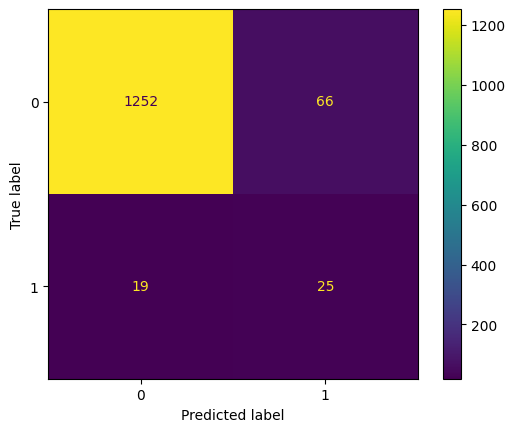

In [ ]:
#Hitung nilai evaluasi
accuracy_adasyn80 = accuracy_score(Y_test80, Y_pred_adasyn80)
precision_adasyn80 = precision_score(Y_test80, Y_pred_adasyn80, zero_division=0)
recall_adasyn80 = recall_score(Y_test80, Y_pred_adasyn80)
f1_adasyn80 = f1_score(Y_test80, Y_pred_adasyn80)

#Create the confusion matrix
cm_adasyn80 = confusion_matrix(Y_test80, Y_pred_adasyn80)

ConfusionMatrixDisplay(confusion_matrix=cm_adasyn80).plot();

#Tampilkan nilai
print(f"Accuracy : {accuracy_adasyn80:.4f}")
print(f"Precision: {precision_adasyn80:.4f}")
print(f"Recall   : {recall_adasyn80:.4f}")
print(f"F1-Score : {f1_adasyn80:.4f}")

### Splitting Data 70:30

In [ ]:
X_train70, X_test70, Y_train70, Y_test70 = train_test_split(X_clean, Y_clean, test_size=0.3, stratify=Y_clean,random_state=42)

In [ ]:
print(len(X_train70))
print(len(X_test70))

4766
2043


In [ ]:
print(Y_train70.value_counts())

Bankrupt?
0    4613
1     153
Name: count, dtype: int64


In [ ]:
print(Y_test70.value_counts())

Bankrupt?
0    1977
1      66
Name: count, dtype: int64


### TANPA SMOTE & ADASYN

In [ ]:
#Train model
rf_nores70 = RandomForestClassifier(random_state=42)
rf_nores70.fit(X_train70, Y_train70)

#Prediksi
Y_pred_nores70 = rf_nores70.predict(X_test70)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
# Ambil kedalaman setiap pohon
depths70_nores = [estimator.tree_.max_depth for estimator in rf_nores70.estimators_]

# Tampilkan
for i, depth70_nores in enumerate(depths70_nores):
    print(f"Pohon ke-{i+1}: depth = {depth70_nores}")

# Ringkasan statistik
print("Kedalaman maksimum:", max(depths70_nores))
print("Kedalaman minimum:", min(depths70_nores))
print("Kedalaman rata-rata:", sum(depths70_nores)/len(depths70_nores))

Pohon ke-1: depth = 15
Pohon ke-2: depth = 15
Pohon ke-3: depth = 17
Pohon ke-4: depth = 22
Pohon ke-5: depth = 13
Pohon ke-6: depth = 16
Pohon ke-7: depth = 16
Pohon ke-8: depth = 16
Pohon ke-9: depth = 18
Pohon ke-10: depth = 19
Pohon ke-11: depth = 19
Pohon ke-12: depth = 15
Pohon ke-13: depth = 14
Pohon ke-14: depth = 17
Pohon ke-15: depth = 19
Pohon ke-16: depth = 15
Pohon ke-17: depth = 16
Pohon ke-18: depth = 14
Pohon ke-19: depth = 20
Pohon ke-20: depth = 16
Pohon ke-21: depth = 17
Pohon ke-22: depth = 16
Pohon ke-23: depth = 17
Pohon ke-24: depth = 16
Pohon ke-25: depth = 20
Pohon ke-26: depth = 16
Pohon ke-27: depth = 16
Pohon ke-28: depth = 16
Pohon ke-29: depth = 17
Pohon ke-30: depth = 18
Pohon ke-31: depth = 14
Pohon ke-32: depth = 16
Pohon ke-33: depth = 12
Pohon ke-34: depth = 19
Pohon ke-35: depth = 17
Pohon ke-36: depth = 19
Pohon ke-37: depth = 16
Pohon ke-38: depth = 14
Pohon ke-39: depth = 20
Pohon ke-40: depth = 19
Pohon ke-41: depth = 14
Pohon ke-42: depth = 18
P

Accuracy : 0.9677
Precision: 0.5000
Recall   : 0.1212
F1-Score : 0.1951
Train Accuracy: 1.0000
Test Accuracy : 0.9677


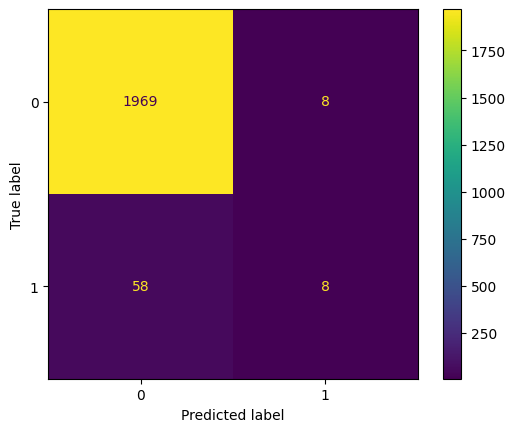

In [ ]:
#Hitung nilai evaluasi
accuracy_nores70 = accuracy_score(Y_test70, Y_pred_nores70)
precision_nores70 = precision_score(Y_test70, Y_pred_nores70, zero_division=0)
recall_nores70 = recall_score(Y_test70, Y_pred_nores70)
f1_nores70 = f1_score(Y_test70, Y_pred_nores70)

# Create the confusion matrix
cm_nores70 = confusion_matrix(Y_test70, Y_pred_nores70)

ConfusionMatrixDisplay(confusion_matrix=cm_nores70).plot();

#Tampilkan nilai
print(f"Accuracy : {accuracy_nores70:.4f}")
print(f"Precision: {precision_nores70:.4f}")
print(f"Recall   : {recall_nores70:.4f}")
print(f"F1-Score : {f1_nores70:.4f}")

###SMOTE

In [ ]:
#Oversampling SMOTE di training data
smote70 = SMOTE(random_state=42)
XSmote_train70, YSmote_train70 = smote70.fit_resample(X_train70, Y_train70)

#Train model
rf_smote70 = RandomForestClassifier(random_state=42)
rf_smote70.fit(XSmote_train70, YSmote_train70)

#Prediksi
Y_pred_smote70 = rf_smote70.predict(X_test70)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
print(YSmote_train70.value_counts())

Bankrupt?
0    4613
1    4613
Name: count, dtype: int64


In [ ]:
# Ambil kedalaman setiap pohon
depths70_smote = [estimator.tree_.max_depth for estimator in rf_smote70.estimators_]

# Tampilkan
for i, depth70_smote in enumerate(depths70_smote):
    print(f"Pohon ke-{i+1}: depth = {depth70_smote}")

# Ringkasan statistik
print("Kedalaman maksimum:", max(depths70_smote))
print("Kedalaman minimum:", min(depths70_smote))
print("Kedalaman rata-rata:", sum(depths70_smote)/len(depths70_smote))

Pohon ke-1: depth = 22
Pohon ke-2: depth = 27
Pohon ke-3: depth = 23
Pohon ke-4: depth = 25
Pohon ke-5: depth = 30
Pohon ke-6: depth = 27
Pohon ke-7: depth = 26
Pohon ke-8: depth = 29
Pohon ke-9: depth = 27
Pohon ke-10: depth = 23
Pohon ke-11: depth = 24
Pohon ke-12: depth = 37
Pohon ke-13: depth = 26
Pohon ke-14: depth = 22
Pohon ke-15: depth = 32
Pohon ke-16: depth = 27
Pohon ke-17: depth = 21
Pohon ke-18: depth = 29
Pohon ke-19: depth = 30
Pohon ke-20: depth = 25
Pohon ke-21: depth = 27
Pohon ke-22: depth = 27
Pohon ke-23: depth = 23
Pohon ke-24: depth = 25
Pohon ke-25: depth = 29
Pohon ke-26: depth = 28
Pohon ke-27: depth = 28
Pohon ke-28: depth = 26
Pohon ke-29: depth = 22
Pohon ke-30: depth = 28
Pohon ke-31: depth = 25
Pohon ke-32: depth = 25
Pohon ke-33: depth = 25
Pohon ke-34: depth = 27
Pohon ke-35: depth = 23
Pohon ke-36: depth = 29
Pohon ke-37: depth = 29
Pohon ke-38: depth = 24
Pohon ke-39: depth = 30
Pohon ke-40: depth = 25
Pohon ke-41: depth = 29
Pohon ke-42: depth = 35
P

In [ ]:
print(YSmote_train70.value_counts())

Bankrupt?
0    4613
1    4613
Name: count, dtype: int64


Accuracy : 0.9383
Precision: 0.2945
Recall   : 0.6515
F1-Score : 0.4057
Train Accuracy: 1.0000
Test Accuracy : 0.9383


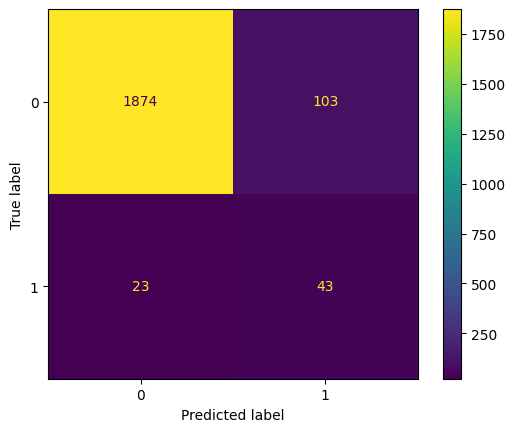

In [ ]:
#Hitung nilai evaluasi
accuracy_smote70 = accuracy_score(Y_test70, Y_pred_smote70)
precision_smote70 = precision_score(Y_test70, Y_pred_smote70, zero_division=0)
recall_smote70 = recall_score(Y_test70, Y_pred_smote70)
f1_smote70 = f1_score(Y_test70, Y_pred_smote70)

# Create the confusion matrix
cm_smote70 = confusion_matrix(Y_test70, Y_pred_smote70)
ConfusionMatrixDisplay(confusion_matrix=cm_smote70).plot();

#Tampilkan nilai
print(f"Accuracy : {accuracy_smote70:.4f}")
print(f"Precision: {precision_smote70:.4f}")
print(f"Recall   : {recall_smote70:.4f}")
print(f"F1-Score : {f1_smote70:.4f}")

In [ ]:
tn, fp, fn, tp = cm_smote70.ravel()
print(tn)
print(fp)
print(fn)
print(tp)

1874
103
23
43


In [ ]:
Y_proba_smote70 = rf_smote70.predict_proba(X_test70)[:, 1]

#Hitung ROC dan AUC
fpr_smote70, tpr_smote70, thresholds_smote70 = roc_curve(Y_test70, Y_proba_smote70)
roc_auc_smote70 = roc_auc_score(Y_test70, Y_proba_smote70)

#Plot ROC curve
plt.figure()
plt.plot(fpr_smote70, tpr_smote70, color='blue', lw=2, label='ROC curve (AUC = %0.4f)' % roc_auc_smote70)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Garis random
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

###ADASYN

In [ ]:
#Oversampling ADASYN di training data
adasyn70 = ADASYN(random_state=42)
XAdasyn_train70, YAdasyn_train70 = adasyn70.fit_resample(X_train70, Y_train70)

#Train model
rf_adasyn70 = RandomForestClassifier(random_state=42)
rf_adasyn70.fit(XAdasyn_train70, YAdasyn_train70)

#Prediksi
Y_pred_adasyn70 = rf_adasyn70.predict(X_test70)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
print(YAdasyn_train70.value_counts())

Bankrupt?
1    4622
0    4613
Name: count, dtype: int64


In [ ]:
# Ambil kedalaman setiap pohon
depths70_adasyn = [estimator.tree_.max_depth for estimator in rf_adasyn70.estimators_]

# Tampilkan
for i, depth70_adasyn in enumerate(depths70_adasyn):
    print(f"Pohon ke-{i+1}: depth = {depth70_adasyn}")

# Ringkasan statistik
print("Kedalaman maksimum:", max(depths70_adasyn))
print("Kedalaman minimum:", min(depths70_adasyn))
print("Kedalaman rata-rata:", sum(depths70_adasyn)/len(depths70_adasyn))

Pohon ke-1: depth = 25
Pohon ke-2: depth = 31
Pohon ke-3: depth = 23
Pohon ke-4: depth = 26
Pohon ke-5: depth = 28
Pohon ke-6: depth = 35
Pohon ke-7: depth = 30
Pohon ke-8: depth = 38
Pohon ke-9: depth = 29
Pohon ke-10: depth = 24
Pohon ke-11: depth = 29
Pohon ke-12: depth = 28
Pohon ke-13: depth = 25
Pohon ke-14: depth = 20
Pohon ke-15: depth = 29
Pohon ke-16: depth = 29
Pohon ke-17: depth = 22
Pohon ke-18: depth = 30
Pohon ke-19: depth = 25
Pohon ke-20: depth = 34
Pohon ke-21: depth = 31
Pohon ke-22: depth = 31
Pohon ke-23: depth = 29
Pohon ke-24: depth = 29
Pohon ke-25: depth = 28
Pohon ke-26: depth = 23
Pohon ke-27: depth = 34
Pohon ke-28: depth = 28
Pohon ke-29: depth = 27
Pohon ke-30: depth = 26
Pohon ke-31: depth = 27
Pohon ke-32: depth = 30
Pohon ke-33: depth = 25
Pohon ke-34: depth = 29
Pohon ke-35: depth = 24
Pohon ke-36: depth = 27
Pohon ke-37: depth = 33
Pohon ke-38: depth = 34
Pohon ke-39: depth = 24
Pohon ke-40: depth = 26
Pohon ke-41: depth = 30
Pohon ke-42: depth = 32
P

In [ ]:
print(YAdasyn_train70.value_counts())

Bankrupt?
1    4622
0    4613
Name: count, dtype: int64


Accuracy : 0.9325
Precision: 0.2600
Recall   : 0.5909
F1-Score : 0.3611
Train Accuracy: 1.0000
Test Accuracy : 0.9325


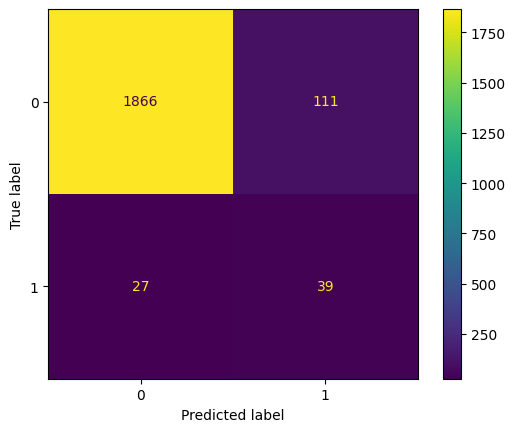

In [ ]:
#Hitung nilai evaluasi
accuracy_adasyn70 = accuracy_score(Y_test70, Y_pred_adasyn70)
precision_adasyn70 = precision_score(Y_test70, Y_pred_adasyn70, zero_division=0)
recall_adasyn70 = recall_score(Y_test70, Y_pred_adasyn70)
f1_adasyn70 = f1_score(Y_test70, Y_pred_adasyn70)

#Create the confusion matrix
cm_adasyn70 = confusion_matrix(Y_test70, Y_pred_adasyn70)

ConfusionMatrixDisplay(confusion_matrix=cm_adasyn70).plot();

#Tampilkan nilai
print(f"Accuracy : {accuracy_adasyn70:.4f}")
print(f"Precision: {precision_adasyn70:.4f}")
print(f"Recall   : {recall_adasyn70:.4f}")
print(f"F1-Score : {f1_adasyn70:.4f}")

#Visualisasi Random Forest

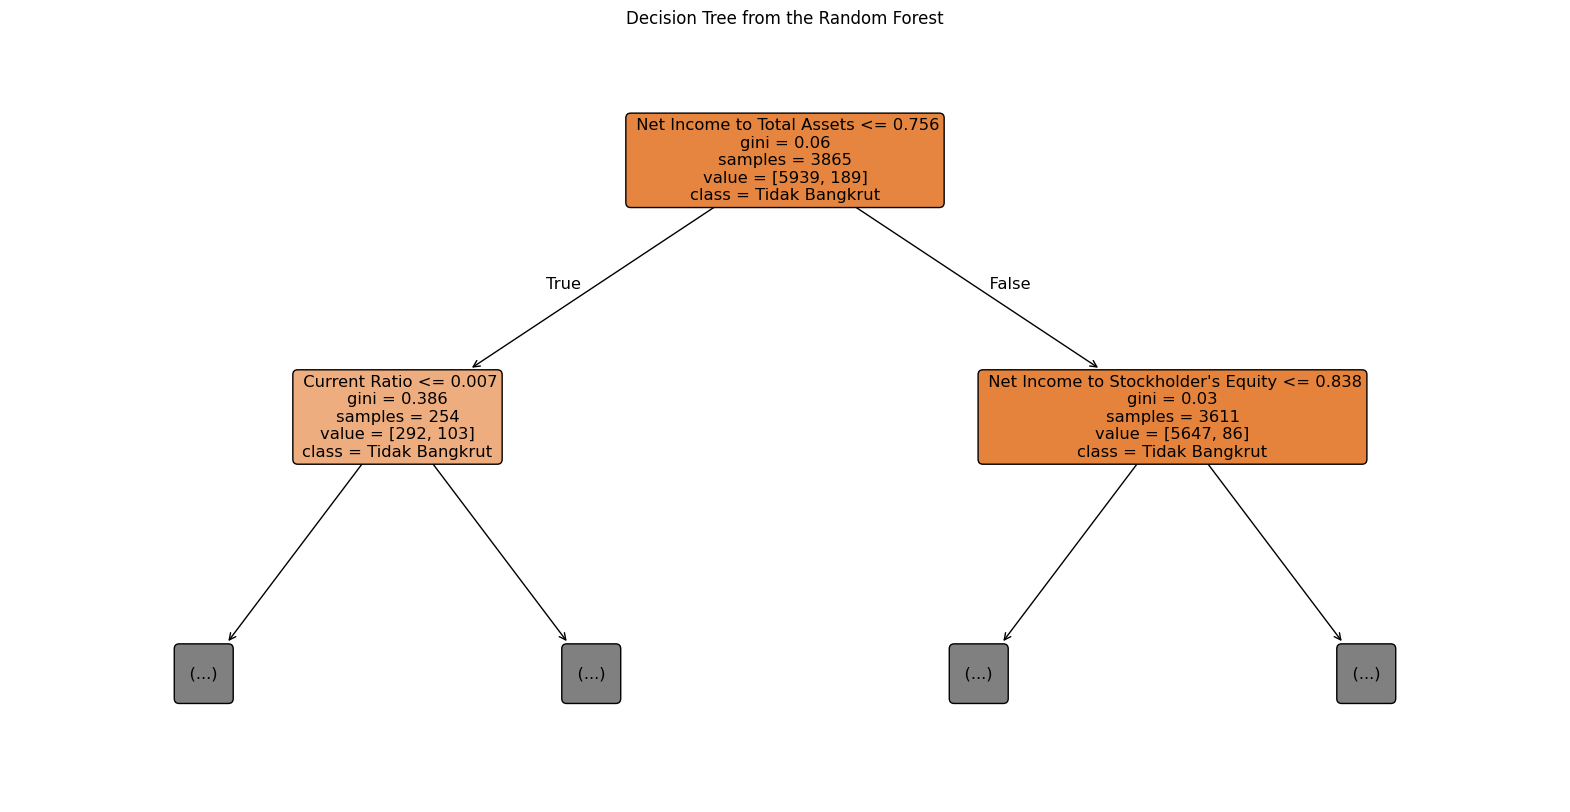

In [ ]:
tree = rf_nores90.estimators_[0]
plt.figure(figsize=(20,10))
plot_tree(tree,
          feature_names=X_clean.columns,
          class_names=['Tidak Bangkrut','Bangkrut'],
          filled=True,
          rounded=True,
          max_depth=1)
plt.title("Decision Tree from the Random Forest")
plt.show()